In [168]:
import pandas as pd
df=pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [169]:
#Non Missing values
ans=df.isna().sum()
print(ans)
#Non Missing values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [170]:
df['day_night']=df['hr'].apply(lambda x: 'day' if 6<=x<=18 else 'night')
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day_night'],
      dtype='object')

In [171]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_night
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,night
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,night
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,night
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,night
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,night


In [172]:
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)

In [173]:
df['dteday'] = pd.to_datetime(df.dteday)

In [174]:
df['dteday'].dtype

dtype('<M8[ns]')

In [175]:
df['season'] = df.season.astype('category')
df['season'].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=False, categories_dtype=int64)

In [176]:
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')
print(df.dtypes)

dteday        datetime64[ns]
season              category
yr                  category
mnth                category
hr                  category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
day_night             object
dtype: object


In [177]:
df.drop('dteday',axis=1,inplace=True)

In [178]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_night
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,night
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,night
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,night
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,night
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,night


In [179]:
df.dtypes

season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
day_night       object
dtype: object

In [180]:
import numpy as np
df['yrhum2'] = np.dot(df['yr'],  (df['hum'] ** 2)) 
df['tempatemp3'] = np.dot(df['temp'] , (df['atemp'] ** 3)) 

In [181]:
X = df.drop(columns=['cnt'])
y = df['cnt']

In [182]:
X.columns = X.columns.astype(str)

In [183]:
X.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'day_night',
       'yrhum2', 'tempatemp3'],
      dtype='object')

In [184]:
import category_encoders as ce
categorical_features=['holiday','workingday','weekday','hr','yr','mnth','season', 'weathersit', 'day_night']




categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('Target_encoder',ce.TargetEncoder() )
])

Xencoded=categorical_pipeline.fit_transform(X[categorical_features],y)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan)

In [189]:
Xencoded.head()

,0,1,2,3,4,5,6,7,8
0,190.42858,181.405332,190.209793,53.898072,143.794448,94.424773,111.114569,204.869272,98.894138
1,190.42858,181.405332,190.209793,33.375691,143.794448,94.424773,111.114569,204.869272,98.894138
2,190.42858,181.405332,190.209793,22.869930,143.794448,94.424773,111.114569,204.869272,98.894138
3,190.42858,181.405332,190.209793,11.727403,143.794448,94.424773,111.114569,204.869272,98.894138
4,190.42858,181.405332,190.209793,6.352941,143.794448,94.424773,111.114569,204.869272,98.894138


In [190]:
X_encoded = pd.DataFrame(Xencoded,columns=categorical_pipeline.named_steps['Target_encoder'].get_feature_names_out(categorical_features))

In [191]:
X = pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)

In [194]:
X.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'yrhum2', 'tempatemp3', '0', '1',
       '2', '3', '4', '5', '6', '7', '8'],
      dtype='object')

In [193]:
X.columns = X.columns.astype(str)

In [195]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

numerical_features=['temp','atemp','hum','windspeed','yrhum2', 'tempatemp3','0','1','2','3','4','5','6','7','8']
numerical_pipeline=Pipeline([('Min-max scaler',MinMaxScaler())])

X[numerical_features] = numerical_pipeline.fit_transform(X[numerical_features])

In [196]:
X.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'yrhum2', 'tempatemp3', '0', '1',
       '2', '3', '4', '5', '6', '7', '8'],
      dtype='object')

In [197]:
X.dtypes

temp          float64
atemp         float64
hum           float64
windspeed     float64
yrhum2        float64
tempatemp3    float64
0             float64
1             float64
2             float64
3             float64
4             float64
5             float64
6             float64
7             float64
8             float64
dtype: object

In [198]:
X.columns = X.columns.astype(str)

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


In [200]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 

mlflow.set_experiment("In-Built Linear Regression with additional features Example")

with mlflow.start_run():
    # Log parameters (you can log any relevant parameters)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("test_size", 0.2)   
    model = LinearRegression()
    model.fit(X_train, y_train)

    print("m:", model.coef_[0])
    print("c:", model.intercept_)

    
    y_pred = model.predict(X_test)

   
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    mlflow.sklearn.log_model(model, "In-built-Linear_Regression_regression_model_with_added_data")

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

mlflow.end_run()


m: -66.17493994960822
c: -212.62739193166556


2024/08/26 22:38:05 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Mean Squared Error: 10412.435570183598
R^2 Score: 0.6711732097982996


In [201]:
X.isna().sum()

temp          0
atemp         0
hum           0
windspeed     0
yrhum2        0
tempatemp3    0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
dtype: int64

In [204]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import mlflow.sklearn

class MyScratchLinearRegression:
    def __init__(self, lr=0.01, epochs=10000):
        self.lr = lr
        self.epochs = epochs
        self.m = None
        self.b = 0
    
    def fit(self, X_train, y_train):
        Xd = np.array(X_train)
        yd = np.array(y_train)
        r, c = Xd.shape
        self.m = np.zeros((c, 1))
        self.b = 0
        
        for epoch in range(self.epochs):
            y_pred = np.dot(Xd, self.m) + self.b
            error = yd.reshape(-1, 1) - y_pred
            dm = -(2/r) * np.dot(Xd.T, error)
            db = -(2/r) * np.sum(error)
            self.m = self.m - self.lr * dm
            self.b = self.b - self.lr * db

            if epoch % 1000 == 0:
                mse = np.mean(error ** 2)
                print(f"Epoch {epoch}, MSE = {mse}")

    def predict(self, X_test):
        X_test = np.array(X_test)
        return np.dot(X_test, self.m) + self.b

    def evaluate(self, y_test, y_pred):
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return mse, r2
    
mlflow.set_experiment("From Scratch Linear Regression with additional features Example")
with mlflow.start_run():
    mlflow.log_param("random_state", 42)
    mlflow.log_param("test_size", 0.2)
    model = MyScratchLinearRegression()
    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    mse, r2 = model.evaluate(y_test, y_pred_test)
    print("MSE on test data:", mse)
    print("R^2 on test data:", r2)

    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)
    mlflow.sklearn.log_model(model, "Scratch-Linear_Regression_regression_model with additional features")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

mlflow.end_run()



Epoch 0, MSE = 69521.54434294757
Epoch 1000, MSE = 12285.62715875146
Epoch 2000, MSE = 11245.454034153363
Epoch 3000, MSE = 10995.49841338102
Epoch 4000, MSE = 10909.111569845376
Epoch 5000, MSE = 10868.156628507355
Epoch 6000, MSE = 10844.153137846923
Epoch 7000, MSE = 10828.29247097813
Epoch 8000, MSE = 10817.09568615638
Epoch 9000, MSE = 10808.88562345859
MSE on test data: 10448.100674768746
R^2 on test data: 0.6700468986884835


2024/08/26 22:39:42 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Mean Squared Error: 10448.100674768746
R^2 Score: 0.6700468986884835


In [212]:
final_pipeline = Pipeline([
    ('cat_preprocess', categorical_pipeline),
('num_preprocess', numerical_pipeline),

('model', MyScratchLinearRegression())
])

In [213]:
from sklearn import set_config
set_config(display='diagram')
final_pipeline

Pipeline(steps=[('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('Target_encoder',
                                  TargetEncoder(cols=[0, 1, 2, 3, 4, 5, 6, 7,
                                                      8]))])),
                ('num_preprocess',
                 Pipeline(steps=[('Min-max scaler', MinMaxScaler())])),
                ('model',
                 <__main__.MyScratchLinearRegression object at 0x0000024E132F67B0>)])

In [215]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



mlflow.set_experiment("From Scratch Linear Regression with additional features Example")


with mlflow.start_run():

    # Log parameters (you can log any relevant parameters)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("test_size", 0.2)


    Xd = np.array(X_train)
    yd = np.array(y_train)
    r,c=Xd.shape
    print(r,c)
    m=np.zeros(c)
    b=0
    m=m.reshape(-1,1)
    

    dm=0
    dc=0
    lr=0.0001
    epochs = 100000
    for epoch in range(epochs):
      y_pred = np.dot(Xd, m) + b
      error = yd.reshape(-1, 1) - y_pred
      dm = -(2/r) * np.dot(Xd.T, error)
      db = -(2/r) * np.sum(error)
      m = m - lr * dm
      b = b - lr * db
      if epoch % 1000 == 0:
        mse = np.mean(error ** 2)
        print(f"Epoch {epoch}, MSE = {mse}")


    # Make predictions
    y_pred_test = np.dot(X_test, m) + b

    # Log metrics
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    print("MSE on test data:", mse)
    print("R^2 on test data:", r2)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    # Log the model
    mlflow.sklearn.log_model(model, "Scratch-Linear_Regression_regression_model with additional features")

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

mlflow.end_run()


13903 15
Epoch 0, MSE = 69521.54434294757
Epoch 1000, MSE = 30821.62163574131
Epoch 2000, MSE = 26552.977307215104
Epoch 3000, MSE = 25373.1722301109
Epoch 4000, MSE = 24533.616537087986
Epoch 5000, MSE = 23786.967542089697
Epoch 6000, MSE = 23105.335989635452
Epoch 7000, MSE = 22480.673881400675
Epoch 8000, MSE = 21907.250105366686
Epoch 9000, MSE = 21380.056390677586
Epoch 10000, MSE = 20894.61290122022
Epoch 11000, MSE = 20446.902101620613
Epoch 12000, MSE = 20033.319087205855
Epoch 13000, MSE = 19650.62803693296
Epoch 14000, MSE = 19295.9233820489
Epoch 15000, MSE = 18966.59511868961
Epoch 16000, MSE = 18660.29781404196
Epoch 17000, MSE = 18374.92290944419
Epoch 18000, MSE = 18108.573966976946
Epoch 19000, MSE = 17859.54454419285
Epoch 20000, MSE = 17626.29841557914
Epoch 21000, MSE = 17407.451889627322
Epoch 22000, MSE = 17201.75799739401
Epoch 23000, MSE = 17008.09235253419
Epoch 24000, MSE = 16825.440504285543
Epoch 25000, MSE = 16652.886624060877
Epoch 26000, MSE = 16489.603383

2024/08/27 01:13:58 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Mean Squared Error: 11820.585428149978
R^2 Score: 0.6267035566804461


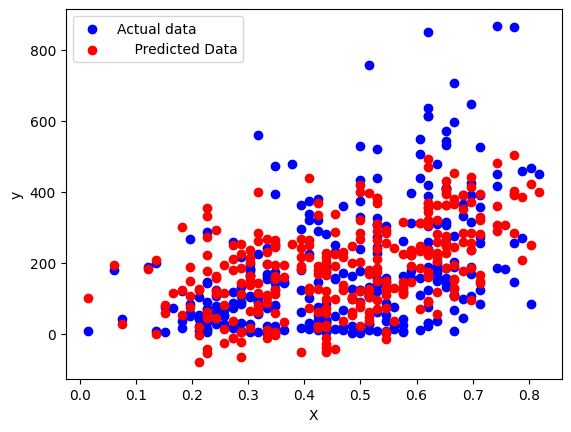

In [222]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.scatter(X_test.iloc[0:300, 1], y_test.iloc[0:300], color='blue', label='Actual data')
plt.scatter(X_test.iloc[0:300, 1], y_pred_test[0:300], color='red', label='    Predicted Data')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [214]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 

mlflow.set_experiment("In-Built Random Forest Regressor with additional features Example")

with mlflow.start_run():
    # Log parameters (you can log any relevant parameters)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("test_size", 0.2)   
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)


    
    y_pred = model.predict(X_test)

   
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mlflow.log_metric("mse", mse)
    mlflow.log_metric("r2", r2)

    mlflow.sklearn.log_model(model, "In-Built Random Forest Regressor with additional features Example")

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

mlflow.end_run()


2024/08/27 01:13:05 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Mean Squared Error: 1874.7331110005055
R^2 Score: 0.9407955547748686


In [209]:
final_pipeline = Pipeline([
('num_preprocess', numerical_pipeline),
('cat_preprocess', categorical_pipeline),
('model', LinearRegression())
])

In [210]:
from sklearn import set_config
set_config(display='diagram')
final_pipeline

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('Min-max scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('Target_encoder',
                                  TargetEncoder(cols=[0, 1, 2, 3, 4, 5, 6, 7,
                                                      8]))])),
                ('model', LinearRegression())])

<Axes: >

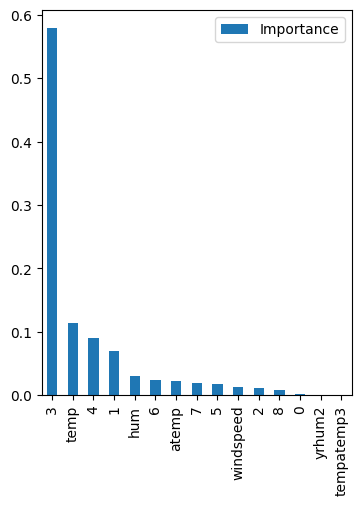

In [211]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns,
columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
# Plotting each feature importance
feat_importances.plot(kind='bar', figsize=(4,5))